# 202202_SimplestRun

# 0. Initialize

In [2]:
#@title Connect to gDrive & Load Files
ENV_COLAB = 'google.colab' in str(get_ipython())
if ENV_COLAB:
    print('Running on CoLab')
    PROJECT_DRIVE_FOLDER= "/content/drive/MyDrive/NiPAMS/BP development/analysis/nipams-bp-py-main/" #@param {"type":"string"}
    ## Load this for local development version of library.. Loads from GoogleDrive (changes persist)
    from google.colab import drive, widgets, data_table; 
    drive.mount('/content/drive');
    %cd "$PROJECT_DRIVE_FOLDER"
  
    !pip install -qr requirements.txt
    !pip install -q envyaml
    import os, sys; 
    from envyaml import EnvYAML; env = EnvYAML('env/default.yml'); 
    for k,v in env.export().items(): os.environ[k]=str(v)
    sys.path.append(os.path.abspath("./src"))

else:
    print('Not running on CoLab')
    %cd /app
!pwd

from importlib import reload;
from utils.constants import *

import warnings
warnings.filterwarnings('ignore')

Running on CoLab
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main
     |████████████████████████████████| 210 kB 7.7 MB/s 
     |████████████████████████████████| 226 kB 63.0 MB/s 
     |████████████████████████████████| 9.6 MB 36.5 MB/s 
     |████████████████████████████████| 175 kB 53.0 MB/s 
     |████████████████████████████████| 357 kB 52.4 MB/s 
/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main


# 1. Connect & Load Data

In [5]:
from data import load_data; reload(load_data)

dfBpAll, dfImuAll = load_data.load_dataframe_from_mat(folder='data/data_cleaned_LVET', pattern='LLV\d.mat')
display('------ dfBpAll ------')
display(dfBpAll)
display('------ dfImuAll ------')
display(dfImuAll)

'------ dfBpAll ------'

,ts,pp,sbp,dbp,ecgTs,file,patient,test_type,test_num
0,0 days 00:00:00,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
1,0 days 00:00:00.001000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
2,0 days 00:00:00.002000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
3,0 days 00:00:00.003000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
4,0 days 00:00:00.004000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
...,...,...,...,...,...,...,...,...,...
7094371,0 days 00:00:56.961000,NaN,NaN,NaN,0.0,sub996_LLV3.mat,sub996,LLV,3
7094372,0 days 00:00:56.962000,NaN,NaN,NaN,0.0,sub996_LLV3.mat,sub996,LLV,3
7094373,0 days 00:00:56.963000,NaN,NaN,NaN,0.0,sub996_LLV3.mat,sub996,LLV,3
7094374,0 days 00:00:56.964000,NaN,NaN,NaN,0.0,sub996_LLV3.mat,sub996,LLV,3


'------ dfImuAll ------'

,ts,ax,ay,az,gx,gy,gz,file,patient,test_type,test_num
0,0 days 00:00:00,-1.139640,1.127669,-9.926359,1.060486,-0.091553,-0.175476,sub019_LLV1.mat,sub019,LLV,1
1,0 days 00:00:00.002000,-1.130063,1.072602,-9.991003,1.449585,-0.389099,-0.205994,sub019_LLV1.mat,sub019,LLV,1
2,0 days 00:00:00.005000,-1.175553,1.098938,-9.998185,1.434326,-0.526428,-0.610352,sub019_LLV1.mat,sub019,LLV,1
3,0 days 00:00:00.007000,-1.175553,1.110909,-10.007762,1.274109,-0.564575,-0.289917,sub019_LLV1.mat,sub019,LLV,1
4,0 days 00:00:00.008000,-1.156399,1.089362,-9.981426,1.350403,-0.282288,-0.518799,sub019_LLV1.mat,sub019,LLV,1
...,...,...,...,...,...,...,...,...,...,...,...
3946718,0 days 00:00:56.956000,2.025494,0.981623,-9.689333,1.007080,0.892639,0.511169,sub996_LLV3.mat,sub996,LLV,3
3946719,0 days 00:00:56.958000,2.061407,0.957681,-9.639055,0.610352,0.839233,0.419617,sub996_LLV3.mat,sub996,LLV,3
3946720,0 days 00:00:56.960000,2.080561,1.005565,-9.629478,0.511169,1.014709,0.236511,sub996_LLV3.mat,sub996,LLV,3
3946721,0 days 00:00:56.962000,2.128445,0.962469,-9.641449,0.511169,0.991821,0.389099,sub996_LLV3.mat,sub996,LLV,3


# 2. Process Signal Data in Heartbeats

In [6]:
from data import preprocess; reload(preprocess)

dfAll = preprocess.merge_imu_vcg_with_heartbeats(dfBpAll, dfImuAll)
display('------ dfAll ------')
display(dfAll)

IndexError: ignored

# 3. Define Data Splits (Patients, Heartbeats, etc)

In [ ]:
from models import experiments

dfImu = dfAll[constants.INDICIES + constants.IMU_COLS]
dfBp = dfAll[constants.INDICIES + constants.BP_COLS]

sampleRandTestInds = experiments.split_by_random(dfImu, dfBp)
sampleExpDfs = experiments.get_experiment(sampleRandTestInds[0], dfImu, dfBp)

print('\n\n'.join([f'''
----- {k}:{v.shape} ------
    heartbeats:{v.groupby(constants.INDICIES).count().shape[0]}
    columns:{v.columns}
    first row : {v.iloc[0].to_list()}
'''
    for k,v in sampleExpDfs.items()
]))


----- train_x:(168314, 10) ------
    heartbeats:987
    columns:Index(['file', 'heartbeat', 'index', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ts'], dtype='object')
    first row : ['sub239_LLV3.mat', 17.0, 91069, -1.3407527923943998, 0.24420854432897998, -9.76594757174421, 1.13677978497, 0.41961669915, 0.38909912103, Timedelta('0 days 00:00:16.914000')]



----- train_y:(168314, 6) ------
    heartbeats:987
    columns:Index(['file', 'heartbeat', 'index', 'pp', 'sbp', 'dbp'], dtype='object')
    first row : ['sub239_LLV3.mat', 17.0, 91069, 60.84115564453285, 127.41911258633849, 66.57795694180565]



----- test_x:(41813, 10) ------
    heartbeats:247
    columns:Index(['file', 'heartbeat', 'index', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ts'], dtype='object')
    first row : ['sub257_LLV3.mat', 26.0, 114328, -0.5422866204951988, 1.3227962817819556, -10.070011151447892, -0.003814697264898352, 2.1743774410499053, -0.12207031248017618, Timedelta('0 days 00:00:25.371000')]



----- test_y:(41813

# 4. Modeling Pipelines (Baselines & Analytical)

In [ ]:
import sklearn
from sklearn.pipeline import Pipeline

In [ ]:
from features import tsfel_vectorizer, simple as features_simple

tsExplodeTransform = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=['az','ax']))
tsVectorizeSimpleTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
tsVectorLookupTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))

from models import baselines, analytical_mvd

pipe_random = Pipeline([('transform', tsExplodeTransform), ('model', baselines.RandomRegressor())])
pipe_mean = Pipeline([('transform', tsExplodeTransform), ('model', baselines.DummyRegressor())])
pipe_vect_simple = Pipeline([('transform', tsVectorizeSimpleTransform), ('model', sklearn.ensemble.RandomForestRegressor())])
# pipe_mvd = Pipeline([('scaler', tsExplodeTransform), ('rand', analytical_mvd.AnalyticalBPEstimator())])     ##TODO : Has a bug.. I think interpolation is broken?

In [ ]:
from features import tsfel_vectorizer; reload(tsfel_vectorizer)
from sklearn import feature_selection
dfVects = pd.read_feather('data/vectors/dfImuVects-LLV.feather')
# tsVectorLookupTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
tsVectorLookupTransform = sklearn.preprocessing.FunctionTransformer(tsfel_vectorizer.VectorLookup(dfVects))

pipe_vect_tsfel = Pipeline([
    ('transform', tsVectorLookupTransform), 
    ('feature_selection_simple', feature_selection.VarianceThreshold()),
    ('feature_selection', feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression())),
    ('model', sklearn.ensemble.GradientBoostingRegressor())])

In [ ]:
from sklearn.metrics import mean_absolute_error

for pipe in [pipe_vect_tsfel, pipe_random, pipe_mean, pipe_vect_simple]:
    pipe.fit(sampleExpDfs['train_x'], sampleExpDfs['train_y'].groupby(constants.INDICIES)['sbp'].mean())
    score = mean_absolute_error(
        pipe.predict(sampleExpDfs['test_x']),
        sampleExpDfs['test_y'].groupby(constants.INDICIES)['sbp'].mean()
    )
    print('Achieved Score (MAE) : ', score, pipe)

Achieved Score (MAE) :  12.732648008040307 Pipeline(steps=[('transform',
                 FunctionTransformer(func=<function VectorLookup.<locals>.vectLookup at 0x7fb2ca6db280>)),
                ('feature_selection_simple', VarianceThreshold()),
                ('feature_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', GradientBoostingRegressor())])
Achieved Score (MAE) :  16.93516295511893 Pipeline(steps=[('transform',
                 FunctionTransformer(func=functools.partial(<function explode_3d at 0x7fb2d37fa820>, data_cols=['az', 'ax']))),
                ('model',
                 <models.baselines.RandomRegressor object at 0x7fb2df4acd00>)])
Achieved Score (MAE) :  12.381454356196016 Pipeline(steps=[('transform',
                 FunctionTransformer(func=functools.partial(<function explode_3d at 0x7fb2d37fa820>, data_cols=['az', 'ax']))),
                ('model', DummyRegressor())])
Achieved Score (MAE) :  12.7222329874244

# 5. Evaluation

In [ ]:
pipe = pipe_vect_simple

train_y = sampleExpDfs['train_y'].groupby(constants.INDICIES)['dbp'].mean()
test_y = sampleExpDfs['test_y'].groupby(constants.INDICIES)['dbp'].mean()

pipe.fit(sampleExpDfs['train_x'], train_y)
preds = pipe.predict(sampleExpDfs['test_x'])

score_mae = mean_absolute_error(preds, test_y)
print('Achieved Score (MAE) : ', score)

Achieved Score (MAE) :  9.0131047069334


<AxesSubplot:xlabel='target', ylabel='preds'>

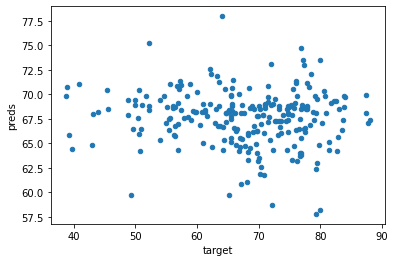

In [ ]:
pd.DataFrame([preds, test_y], ['preds','target']).T.plot.scatter(1,0)